## Создание базовых генеративно-созтязательных сетей (GAN)

> Неделя 1 (Введение в GAN)

<hr>

### Разновидности моделей в машинном обучении

> - Дискриминативные модели - используются для классификации (например, различие между кошками и собаками)
> - **Генеративные модели** - пытаются узнать как сделать реалистичное представление некоторого класса (например, представление собаки)

<h4 align="center">
    <img width="600px" src="./img/discriminative_and_generative_models.png" alt="Дискриминативные и генеративные модели" />
</h4>

### Типы генеративных моделей

- Вариационные автоэнкодеры (VAE)

<h4 align="center">
    <img width="600px" src="./img/vae_schema.jpg" alt="VAE" />
</h4>

- **Генеративно-состязательные сети (GAN)**

<h4 align="center">
    <img width="600px" src="./img/gan_schema.png" alt="GAN" />
</h4>

<h4 align="center">
    <img width="600px" src="./img/gan_schema_in_detail.png" alt="Detail GAN" />
</h4>

<h4 align="center">
    <img width="300px" src="./img/gan_schema_in_detail_2.png" alt="Detail GAN" />
</h4>

### Эволюция GAN

> GAN существуют с 2014 года (см. [Generative Adversarial Networks](https://arxiv.org/abs/1406.2661)), однако уже достигли впечатляющей производительности при выполнении множества задач (см. [StyleGAN2](https://www.thispersondoesnotexist.com/)).

<h4 align="center">
    <img width="600px" src="./img/evolution_gan.jpg" alt="Эволюция GAN" />
</h4>

> GAN могут учиться на любых данных, которые им предоставлены.

### Логика GAN

> GAN - это мощные модели способные учиться создавать реалистичные объекты, которые будут трудно отличить от существующих реальных (например, человеческие лица). GAN состоят из генератора и дискриминатора, которые конкурируют между собой.
>
> - Генератор (подделыватель картин) учится генерировать фейки, которые выглядят настоящими, чтобы обмануть дискриминатор

<h4 align="center">
    <img width="600px" src="./img/generator.jpg" alt="Генератор" />
</h4>

> - Дискриминатор (арт-инспектор) учится различать что настоящее, а что подделка
> 
> **Особенности обучения:**
> - В процессе обучения генератору не разрешено видеть оригинальных изображений. Он даже не знает, что представляют из себя эти изображения
> - Дискриминатору разрешено смотреть на оригинальные изображения в процессе обучения. Однако на вход ему подаются перемешанные фейковые и оригинальные изображения и он не знает, какие из них настоящие. Это дискриминатору предстоит выяснить в процессе обучения.
>
> **Проблема при обучении:**
> - Слишком быстрый процесс обучения дискриминатора. Когда дискриминатор обучается быстро, он смотрит на поддельное изображение и говорит: это 100% подделка. Однако эти 100% бесполезны для генератора, потому что он не знает в каком направлении улучшаться. Таким образом, вывод дискриминатора будет более информативным, например, если он определит, что изображение фальшивое на 87% или 20%, в отличие от 100%.

### Введение в PyTorch

> **PyTorch** наравне с **TensorFlow** самые популярные фреймворки для глубокого машинного обучения
>
> Основное различие между ними **PyTorch** и **TensorFlow** заключается в способе, которым они обычно производят вычисления, в **PyTorch** все вычисления производятся последовательно (императивное программирование). В **TensorFlow** сперва опрелеляются функции, а потом производятся вычисления (символический подход).

<h4 align="center">
    <img width="600px" src="./img/PyTorch_TensorFlow.png" alt="PyTorch и TensorFlow" />
</h4>

### Установка PyTorch

> CMD
>
> ```shell script
> pip install torch torchvision
> ```

### Импорт необходимых инструментов

In [1]:
import torch # Машинное обучение (Facebook)
from torch import nn # Настраиваемые слои для моделей глубокого обучения

import pandas as pd # Обработка и анализ данных
import numpy as np # Научные вычисления
import matplotlib as mpl # Визуализация графиков

import matplotlib.pyplot as plt # Визуализация 2D и 3D графики

### Версии необходимых библиотек

In [2]:
pkgs = {
    'Package': ['PyTorch', 'NumPy', 'Pandas', 'Matplotlib'],
    'Version': [i.__version__ for i in [torch, np, pd, mpl]]}

df_pkgs = pd.DataFrame(data = pkgs) # Версии используемых библиотек
df_pkgs.head(None).style.hide_index() # Отображение первых N строк или все если указать None

Package,Version
PyTorch,1.6.0+cu101
NumPy,1.18.5
Pandas,1.1.3
Matplotlib,3.3.2


### Определение модели PyTorch (Линейная регрессия)

In [8]:
# Линейная регрессия
class LinearRegression(nn.Module):
    # Конструктор
    def __init__(self, n):
        '''
        n - количество входных данных
        '''
        super().__init__()
        
        # Определение архитектуры логистической регрессии
        self.linear_reg = nn.Linear(n, 1)
    
    def forward(self, x):
        '''
        x - количество входных данных
        '''
        return self.linear_reg(x) # Логистическая регрессия

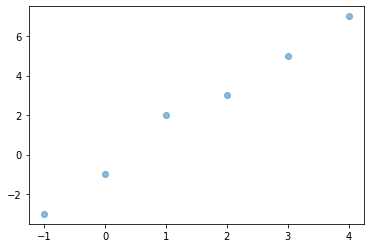

In [9]:
# Набор данных
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype = float).astype(np.float32) # X
ys = np.array([-3.0, -1.0, 2.0, 3.0, 5.0, 7.0], dtype = float).astype(np.float32) # Y

# Транспонирование
xs = xs.reshape(-1, 1)
ys = ys.reshape(-1, 1)

plt.scatter(xs, ys, alpha = 0.5)
plt.show()

Эпоха: 50, Loss: 1.3839339017868042
Эпоха: 100, Loss: 0.5783388614654541
Эпоха: 150, Loss: 0.2930307388305664
Эпоха: 200, Loss: 0.19195760786533356
Эпоха: 250, Loss: 0.15615150332450867
Эпоха: 300, Loss: 0.14346688985824585
Эпоха: 350, Loss: 0.13897323608398438
Эпоха: 400, Loss: 0.13738130033016205
Эпоха: 450, Loss: 0.1368173360824585
Эпоха: 500, Loss: 0.13661755621433258


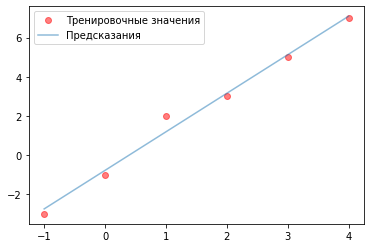

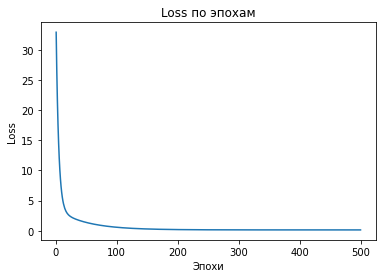

18.893264770507812

In [11]:
model = LinearRegression(xs.shape[1]) # Инициализация модели
model.parameters()

criterion = nn.MSELoss() # Функция стоимости модели
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) # Оптимизатор

n_epoch = 500 # Количество эпох
loss_in_each_epoch = [] # Loss

# Обучение модели
for epoch in range(n_epoch):
    epoch += 1
    
    # Преобразование numpy в torch
    xst = torch.from_numpy(xs)
    yst = torch.from_numpy(ys)
    
    optimizer.zero_grad() # Очистка градиентов от всех оптимизированных тензоров
    y_pred = model(xst) # Предсказания модели
    loss = criterion(y_pred, yst) # Функция потерь
    loss.backward()
    optimizer.step()
    
    # Loss
    loss_in_each_epoch.append(loss.item())
    
    if (epoch) % 50 == 0:
        print('Эпоха: {}, Loss: {}'.format(epoch, loss.item()))

# Получение предсказаний
predicted = model.forward(torch.from_numpy(xs)).cpu().data.numpy()

plt.plot(xs, ys, 'ro', label = 'Тренировочные значения', alpha = 0.5)
plt.plot(xs, predicted, label = 'Предсказания', alpha = 0.5)
plt.legend()
plt.show()

# Всего эпох
epoch = [i for i in range(1, n_epoch + 1)]

plt.plot(epoch, loss_in_each_epoch)
plt.title('Loss по эпохам')
plt.xlabel('Эпохи')
plt.ylabel('Loss')
plt.show()

# Тестовое значение
x_test = torch.Tensor([[10.0]])

predicted = model.forward((x_test))

predicted.item()

### Статья

> [Состояние фреймворков машинного обучения в 2019 году](https://thegradient.pub/state-of-ml-frameworks-2019-pytorch-dominates-research-tensorflow-dominates-industry/)

### Введение в PyTorch

In [23]:
torch.cuda.get_device_name() # Получение имени устройства

'GeForce RTX 2080 Ti'

#### Формирование тензора

In [20]:
tensor = torch.Tensor([
    [[1, 2], [3, 4]], 
    [[5, 6], [7, 8]], 
    [[9, 0], [1, 2]]
])

tensor

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]],

        [[9., 0.],
         [1., 2.]]])

#### Просмотр устройства

In [21]:
tensor.device

device(type='cpu')

#### Выполнение на другом устройстве (**cpu** или **cuda**)

In [24]:
new_tensor = tensor.to('cpu') # Или cuda

#### Просмотр измерения тензора

In [25]:
tensor.shape

torch.Size([3, 2, 2])

In [26]:
print('Ранг =', len(tensor.shape))
print('Всего элементов в тензоре =', tensor.numel())

Ранг = 3
Всего элементов в тензоре = 12


#### Индексация тензора

In [27]:
tensor[1] # Строка под индексом 1

tensor([[5., 6.],
        [7., 8.]])

In [28]:
tensor[1, 1, 0]

tensor(7.)

In [29]:
tensor[1, 1, 0].item() # Значение из тензора в формате Python

7.0

In [30]:
tensor[:, 1, 1] # Столбец

tensor([4., 8., 2.])

#### Генерация тензора

In [31]:
torch.ones_like(tensor) # Тензор заполненный единицами

tensor([[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]])

In [32]:
torch.zeros_like(tensor) # Тензор заполненный нулями

tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]])

In [33]:
torch.randn_like(tensor) # Тензор с нормальным Гауссовским распределением

tensor([[[-7.3456e-01, -1.1403e-03],
         [-2.2276e-01, -1.1566e-02]],

        [[ 1.1134e+00, -2.3763e-01],
         [-1.7897e-01,  1.2238e+00]],

        [[ 5.9137e-01,  3.6763e-01],
         [ 1.3689e+00, -1.0144e+00]]])

In [34]:
torch.randn(2, 2, device = 'cpu') # Тензор с нормальным Гауссовским распределением

tensor([[0.2210, 2.0124],
        [0.6846, 1.2589]])

### Введение в GAN

#### Дискриминатор против генератора

> Два основных компонента GAN это **генератор** и **дискриминатор**

##### Дискриминатор (классификатор)

> Одним из наиболее используемых типов моделей машинного обучения является классификатор, который используется для сортировки элементов в наборе данных и классификации их по различным категориям. Например, классификатор изображений, который может различать изображения кошек или собак.

<h4 align="center">
    <img width="600px" src="./img/classificator.gif" alt="Дискриминатор" />
</h4>

> С точки зрения теории вероятности классификатор хочет вычислить $p(y|x)$, тоесть вероятность того, что при вводе $x$, необходимо узнать вероятность его класса $y$, которая является котом $p(y=\text{кошка}|x)$ или собакой $p(y=\text{собака}|x)$.
>
> Дискриминатор - это просто классификатор с двумя классами: настоящий и поддельный. Учитывая входное $x$ дискриминатор вычислит вероятности $p(настоящий|x)$ и $p(подделка|x)$ и в конечном итоге классифицирует $x$. Входной $x$ не ограничивается изображениями и может быть всем чем угодно. GAN можно обучить работе с видео, текстом, аудио и т.д.

##### Генератор

> С точки зрения теории вероятности генератор хочет вычислить $p(x|y)$, тоесть вероятность того, на сколько созданный им $(y=\text{объект})$ похож на оригинальный $x$.
>
> На примере видно, как генератор пытается найти особенности, которые представляют всех кошек, используя обратную связь от дискриминатора.

<h4 align="center">
    <img width="600px" src="./img/gan2.png" alt="Генератор" />
</h4>